# Code Execution


AgentChat offers a `CodeExecutorAgent` agent that can execute code in messages it receives. 

:::{note}
See [here](pkg-info-autogen-agentchat) for installation instructions.
:::

:::{warning}
🚧 Under construction 🚧
:::

In [3]:
from autogen_agentchat.agents import CodeExecutorAgent, CodingAssistantAgent
from autogen_agentchat.teams import RoundRobinGroupChat, StopMessageTermination
from autogen_core.components.models import OpenAIChatCompletionClient
from autogen_ext.code_executor.docker_executor import DockerCommandLineCodeExecutor

async with DockerCommandLineCodeExecutor(work_dir="coding") as code_executor:  # type: ignore[syntax]
    code_executor_agent = CodeExecutorAgent("code_executor", code_executor=code_executor)
    coding_assistant_agent = CodingAssistantAgent(
        "coding_assistant", model_client=OpenAIChatCompletionClient(model="gpt-4o")
    )
    group_chat = RoundRobinGroupChat([coding_assistant_agent, code_executor_agent])
    result = await group_chat.run(
        task="Create a plot of NVDIA and TSLA stock returns YTD from 2024-01-01 and save it to 'nvidia_tesla_2024_ytd.png'.",
        termination_condition=StopMessageTermination(),
    )
    print(result)

--------------------------------------------------------------------------------
user:
Create a plot of NVDIA and TSLA stock returns YTD from 2024-01-01 and save it to 'nvidia_tesla_2024_ytd.png'.

--------------------------------------------------------------------------------
coding_assistant:
To create a plot of NVIDIA and TSLA stock returns from January 1, 2024, year-to-date, we will perform the following steps:

1. **Install Required Libraries:**
   We'll need `pandas`, `matplotlib`, and `yfinance` to fetch and plot the stock data. Make sure these libraries are installed.

2. **Fetch the Stock Data:**
   Use the `yfinance` library to download the stock data for NVIDIA (ticker: NVDA) and Tesla (ticker: TSLA) from January 1, 2024.

3. **Calculate Stock Returns:**
   Calculate the percentage returns of both stocks over the date range.

4. **Plot the Data:**
   Plot NVIDIA and Tesla returns using `matplotlib` and save the plot as 'nvidia_tesla_2024_ytd.png'.

Here's the complete code 

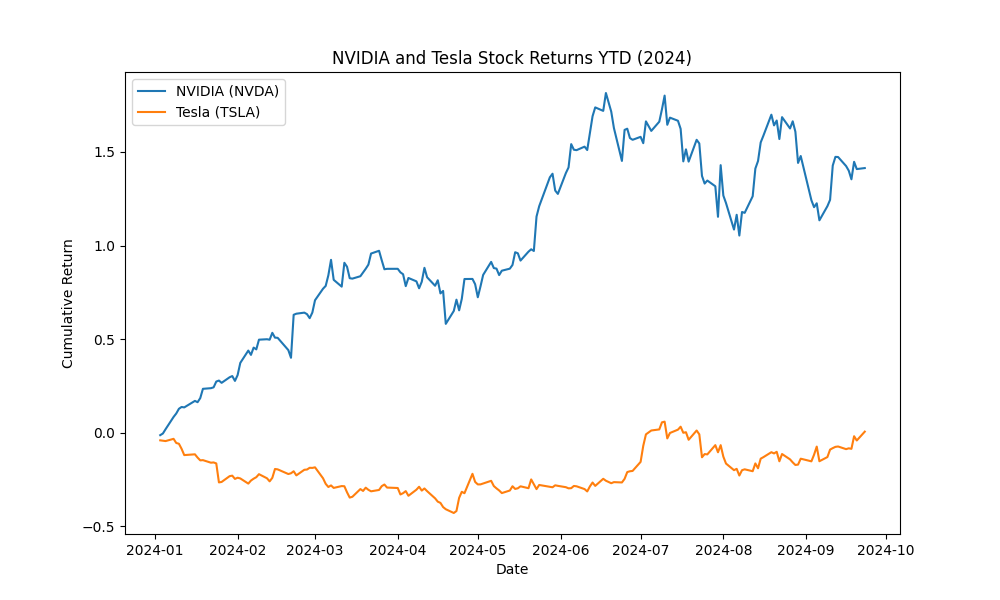

In [4]:
from IPython.display import Image

Image(filename="coding/nvidia_tesla_2024_ytd.png")  # type: ignore